In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


- You can access keras pretrained models from keras.application

In [2]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

# VGG model
We are going to use this source model to transfer knowledge to our target model

In [4]:
vgg19 = VGG19()

574717952/574710816 [==============================] - 9s 0us/step


- All these pretrained model has a preprocessing method that we can employ.
- WE can decide to preprocess eg our input images ourselves eg say to convert to grayscale, or just use there own.
- 'decode_prediction' is like predict_classes, but it tells us the class name and confidence level and also accuracy of prediction

# Image 1 - Bird

In [5]:
sample_img = load_img('/content/gdrive/My Drive/Deep Learning/humming_bird_1.jpg', target_size=(224,224))

unprocessed image, direct input

In [6]:
sample_img = img_to_array(sample_img)
unprocessed_sample_img = np.expand_dims(sample_img, 0)

In [7]:
unprocessed_sample_img.shape

(1, 224, 224, 3)

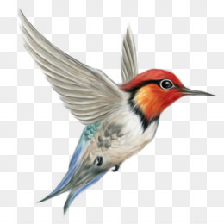

In [8]:
array_to_img(np.squeeze(unprocessed_sample_img))

processed image, using pretrained model's preprocess_input

In [9]:
processed_sample_img = preprocess_input(unprocessed_sample_img)

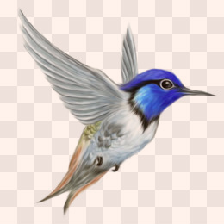

In [10]:
array_to_img(np.squeeze(processed_sample_img))

## Unprocessed Prediction 

In [11]:
pred = vgg19.predict(unprocessed_sample_img)

In [14]:
np.argmax(pred)

94

In [15]:
pred_class = decode_predictions(pred, top=1)

In [16]:
pred_class

[[('n01833805', 'hummingbird', 0.4939812)]]

In [17]:
print('Name of Animal: ',pred_class[0][0][1])
print('Accuracy: ', round(pred_class[0][0][2]*100,2))

Name of Animal:  hummingbird
Accuracy:  49.4


## Processed Prediction 

In [18]:
pred = vgg19.predict(processed_sample_img)

In [19]:
np.argmax(pred)

92

In [20]:
pred_class = decode_predictions(pred, top=1)

In [21]:
pred_class

[[('n01828970', 'bee_eater', 0.8890658)]]

In [22]:
print('Name of Animal: ',pred_class[0][0][1])
print('Accuracy: ', round(pred_class[0][0][2]*100,2))

Name of Animal:  bee_eater
Accuracy:  88.91


# Pre_trained Model Summary

In [23]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Image 2 - Panda

In [25]:
sample_img = load_img('/content/gdrive/My Drive/Deep Learning/panda_2.png', target_size=(224,224))

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


unprocessed image, direct input

In [29]:
sample_img = img_to_array(sample_img)
unprocessed_sample_img = np.expand_dims(sample_img, 0)
unprocessed_sample_img.shape

(1, 224, 224, 3)

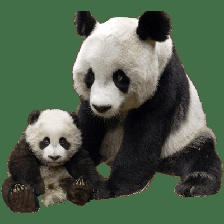

In [28]:
array_to_img(np.squeeze(unprocessed_sample_img))

processed image, using pretrained model's preprocess_input

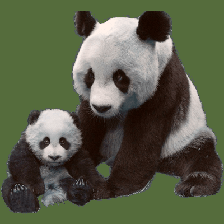

In [30]:
processed_sample_img = preprocess_input(unprocessed_sample_img)
array_to_img(np.squeeze(processed_sample_img))

## Unprocessed Prediction 

In [33]:
pred = vgg19.predict(unprocessed_sample_img)
pred_class = decode_predictions(pred, top=1)
print(np.argmax(pred))
print(pred_class)

850
[[('n04399382', 'teddy', 0.3114516)]]


In [34]:
print('Name of Animal: ',pred_class[0][0][1])
print('Accuracy: ', round(pred_class[0][0][2]*100,2))

Name of Animal:  teddy
Accuracy:  31.15


## Processed Prediction 

In [35]:
pred = vgg19.predict(processed_sample_img)
pred_class = decode_predictions(pred, top=1)
print(np.argmax(pred))
print(pred_class)

388
[[('n02510455', 'giant_panda', 0.99808455)]]


In [36]:
print('Name of Animal: ',pred_class[0][0][1])
print('Accuracy: ', round(pred_class[0][0][2]*100,2))

Name of Animal:  giant_panda
Accuracy:  99.81


# Using the model's preprocessor performs better on predictions

# Image 3 - Peacock

In [41]:
sample_img = load_img('/content/gdrive/My Drive/Deep Learning/Peacock_3_650x425.jpg', target_size=(224,224))

unprocessed image, direct input

In [39]:
sample_img = img_to_array(sample_img)
unprocessed_sample_img = np.expand_dims(sample_img, 0)
unprocessed_sample_img.shape

(1, 224, 224, 3)

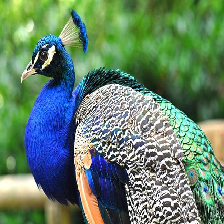

In [40]:
array_to_img(np.squeeze(unprocessed_sample_img))

processed image, using pretrained model's preprocess_input

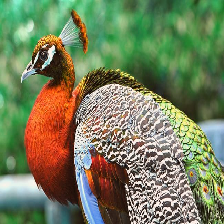

In [42]:
processed_sample_img = preprocess_input(unprocessed_sample_img)
array_to_img(np.squeeze(processed_sample_img))

## Unprocessed Prediction 

In [43]:
pred = vgg19.predict(unprocessed_sample_img)
pred_class = decode_predictions(pred, top=1)
print(np.argmax(pred))
print(pred_class)

84
[[('n01806143', 'peacock', 0.79831934)]]


In [44]:
print('Name of Animal: ',pred_class[0][0][1])
print('Accuracy: ', round(pred_class[0][0][2]*100,2))

Name of Animal:  peacock
Accuracy:  79.83


## Processed Prediction 

In [45]:
pred = vgg19.predict(processed_sample_img)
pred_class = decode_predictions(pred, top=1)
print(np.argmax(pred))
print(pred_class)

84
[[('n01806143', 'peacock', 1.0)]]


In [46]:
print('Name of Animal: ',pred_class[0][0][1])
print('Accuracy: ', round(pred_class[0][0][2]*100,2))

Name of Animal:  peacock
Accuracy:  100.0


# Image 4 - turtle

In [47]:
sample_img = load_img('/content/gdrive/My Drive/Deep Learning/turtle_PNG69.png', target_size=(224,224))

unprocessed image, direct input

In [48]:
sample_img = img_to_array(sample_img)
unprocessed_sample_img = np.expand_dims(sample_img, 0)
unprocessed_sample_img.shape

(1, 224, 224, 3)

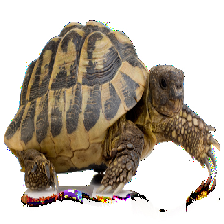

In [49]:
array_to_img(np.squeeze(unprocessed_sample_img))

processed image, using pretrained model's preprocess_input

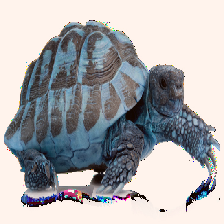

In [50]:
processed_sample_img = preprocess_input(unprocessed_sample_img)
array_to_img(np.squeeze(processed_sample_img))

## Unprocessed Prediction 



In [51]:
pred = vgg19.predict(unprocessed_sample_img)
pred_class = decode_predictions(pred, top=1)
print(np.argmax(pred))
print(pred_class)

36
[[('n01667778', 'terrapin', 0.421308)]]


In [52]:
print('Name of Animal: ',pred_class[0][0][1])
print('Accuracy: ', round(pred_class[0][0][2]*100,2))

Name of Animal:  terrapin
Accuracy:  42.13


## Processed Prediction 

In [53]:
pred = vgg19.predict(processed_sample_img)
pred_class = decode_predictions(pred, top=1)
print(np.argmax(pred))
print(pred_class)

37
[[('n01669191', 'box_turtle', 0.283967)]]


In [54]:
print('Name of Animal: ',pred_class[0][0][1])
print('Accuracy: ', round(pred_class[0][0][2]*100,2))

Name of Animal:  box_turtle
Accuracy:  28.4


# Image 5, trial - Pokemon

In [56]:
sample_img = load_img('/content/gdrive/My Drive/Deep Learning/pokemon.jpg', target_size=(224,224))

unprocessed image, direct input

In [57]:
sample_img = img_to_array(sample_img)
unprocessed_sample_img = np.expand_dims(sample_img, 0)
unprocessed_sample_img.shape

(1, 224, 224, 3)

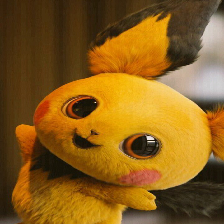

In [58]:
array_to_img(np.squeeze(unprocessed_sample_img))

processed image, using pretrained model's preprocess_input

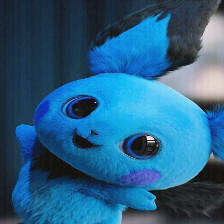

In [59]:
processed_sample_img = preprocess_input(unprocessed_sample_img)
array_to_img(np.squeeze(processed_sample_img))

## Unprocessed Prediction 

In [60]:
pred = vgg19.predict(unprocessed_sample_img)
pred_class = decode_predictions(pred, top=1)
print(np.argmax(pred))
print(pred_class)

88
[[('n01818515', 'macaw', 0.251354)]]


In [61]:
print('Name of Animal: ',pred_class[0][0][1])
print('Accuracy: ', round(pred_class[0][0][2]*100,2))

Name of Animal:  macaw
Accuracy:  25.14


## Processed Prediction 

In [64]:
pred = vgg19.predict(processed_sample_img)
pred_class = decode_predictions(pred, top=1)
print(np.argmax(pred))
print(pred_class)

850
[[('n04399382', 'teddy', 0.42172992)]]


In [65]:
print('Name of Animal: ',pred_class[0][0][1])
print('Accuracy: ', round(pred_class[0][0][2]*100,2))

Name of Animal:  teddy
Accuracy:  42.17


# Pretrained 2 - Xception

In [75]:
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions

In [67]:
xcep = Xception()

91889664/91884032 [==============================] - 2s 0us/step


# XCEP on turtle and Peacock

In [68]:
sample_img_t = load_img('/content/gdrive/My Drive/Deep Learning/turtle_PNG69.png', target_size=(224,224))
sample_img_p = load_img('/content/gdrive/My Drive/Deep Learning/Peacock_3_650x425.jpg', target_size=(224,224))

unprocessed image, direct input

In [69]:
sample_img_t = img_to_array(sample_img_t)
unprocessed_sample_img_t = np.expand_dims(sample_img_t, 0)
unprocessed_sample_img_t.shape

(1, 224, 224, 3)

In [70]:
sample_img_p = img_to_array(sample_img_p)
unprocessed_sample_img_p = np.expand_dims(sample_img_p, 0)
unprocessed_sample_img_p.shape

(1, 224, 224, 3)

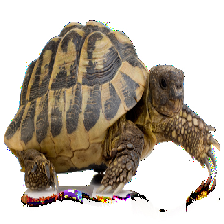

In [71]:
# Turtle
array_to_img(np.squeeze(unprocessed_sample_img_t))

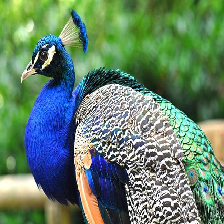

In [72]:
# Peacock
array_to_img(np.squeeze(unprocessed_sample_img_p))

processed image, using pretrained model's preprocess_input

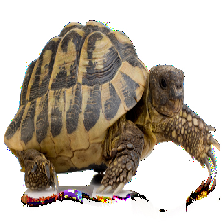

In [82]:
processed_sample_img_t = preprocess_input(unprocessed_sample_img_t)
array_to_img(np.squeeze(processed_sample_img_t))

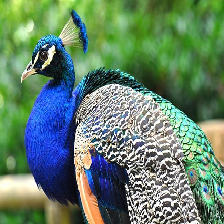

In [77]:
processed_sample_img_p = preprocess_input(unprocessed_sample_img_p)
array_to_img(np.squeeze(processed_sample_img_p))

## Unprocessed Prediction 



In [84]:
# Turtle
pred_t = xcep.predict(unprocessed_sample_img_t)
pred_class_t = decode_predictions(pred_t, top=1)
print(np.argmax(pred_t))
print(pred_class_t)

644
[[('n03729826', 'matchstick', 0.0059886696)]]


In [85]:
pred_p = xcep.predict(unprocessed_sample_img_p)
pred_class_p = decode_predictions(pred_p, top=1)
print(np.argmax(pred_p))
print(pred_class_p)

607
[[('n03590841', "jack-o'-lantern", 0.006517502)]]


In [88]:
# Peacock
print('Name of Animal: ',pred_class_t[0][0][1])
print('Accuracy: ', round(pred_class_t[0][0][2]*100,2))
# Peacock
print('Name of Animal: ',pred_class_p[0][0][1])
print('Accuracy: ', round(pred_class_p[0][0][2]*100,2))

Name of Animal:  matchstick
Accuracy:  0.6
Name of Animal:  jack-o'-lantern
Accuracy:  0.65


## Processed Prediction 

In [89]:
# Turtle
pred_t = xcep.predict(processed_sample_img_t)
pred_class_t = decode_predictions(pred_t, top=1)
print(np.argmax(pred_t))
print(pred_class_t)

644
[[('n03729826', 'matchstick', 0.0059886696)]]


In [90]:
pred_p = xcep.predict(processed_sample_img_p)
pred_class_p = decode_predictions(pred_p, top=1)
print(np.argmax(pred_p))
print(pred_class_p)

607
[[('n03590841', "jack-o'-lantern", 0.006517502)]]


In [91]:
print('Name of Animal: ',pred_class_t[0][0][1])
print('Accuracy: ', round(pred_class_t[0][0][2]*100,2))

Name of Animal:  matchstick
Accuracy:  0.6


# XCeption performed woefully on our animal images 
- probably because this pretrained model was trained on objects
- the training set domain is different from that of animals
# Reason to choose a pretrained model of similar domain i.e. related to task at hand